#**Лабораторная работа 4**
##**Вариант 1: Расход топлива**

Этот набор данных содержит данные о расходе топлива (миль на галлон) различ-
ных моделей автомобилей, а также другие характеристики, такие как объем двигателя,
мощность в лошадиных силах, вес, ускорение и год выпуска модели.
Атрибуты:
* mpg – расход топлива
* cylinders – число цилиндров
* displacement – объем двигателя
* horsepower – мощность (л.с.)
* weight – вес
* acceleration – ускорение
* model year – год модели
* origin – происхождение (1 – США, 2 – Европа, 3 – Япония)
* car name – модель

###**Цель лабораторной работы:**
изучение принципов решения задачи многомерной
регрессии с использованием методов машинного обучения.
###**Основные задачи:**
* изучение инструментария Python для реализации алгоритмов многомерной
регрессии;
* освоение метода линейной регрессии;
* изучение методов оценки корректности модели многомерной линейной
регрессии;

##**Импортируем библиотеки и загружаем данные**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('/content/drive/MyDrive/ОмГТУ/3 курс/5 семак/Машинное обучение/4 лр/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


##**Получим информацию о датасете**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


##**Проверяем количество пропущенных значений и выбросов**

In [19]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


##**Заменяем категориальные значения числовыми**

In [20]:
(unique, counts) = np.unique(df['car name'], return_counts=True)
print('Unique values of the variable: ', unique)
print('Counts: ', counts)

Unique values of the variable:  ['amc ambassador brougham' 'amc ambassador dpl' 'amc ambassador sst'
 'amc concord' 'amc concord d/l' 'amc concord dl' 'amc concord dl 6'
 'amc gremlin' 'amc hornet' 'amc hornet sportabout (sw)' 'amc matador'
 'amc matador (sw)' 'amc pacer' 'amc pacer d/l' 'amc rebel sst'
 'amc spirit dl' 'audi 100 ls' 'audi 100ls' 'audi 4000' 'audi 5000'
 'audi 5000s (diesel)' 'audi fox' 'bmw 2002' 'bmw 320i' 'buick century'
 'buick century 350' 'buick century limited' 'buick century luxus (sw)'
 'buick century special' 'buick electra 225 custom'
 'buick estate wagon (sw)' 'buick lesabre custom'
 'buick opel isuzu deluxe' 'buick regal sport coupe (turbo)'
 'buick skyhawk' 'buick skylark' 'buick skylark 320'
 'buick skylark limited' 'cadillac eldorado' 'cadillac seville' 'capri ii'
 'chevroelt chevelle malibu' 'chevrolet bel air' 'chevrolet camaro'
 'chevrolet caprice classic' 'chevrolet cavalier'
 'chevrolet cavalier 2-door' 'chevrolet cavalier wagon'
 'chevrolet chevel

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder_o = LabelEncoder()
df['car name'] = labelencoder_o.fit_transform(df['car name'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,49
1,15.0,8,350.0,165.0,3693,11.5,70,1,36
2,18.0,8,318.0,150.0,3436,11.0,70,1,231
3,16.0,8,304.0,150.0,3433,12.0,70,1,14
4,17.0,8,302.0,140.0,3449,10.5,70,1,161
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,153
394,44.0,4,97.0,52.0,2130,24.6,82,2,301
395,32.0,4,135.0,84.0,2295,11.6,82,1,119
396,28.0,4,120.0,79.0,2625,18.6,82,1,159


##**Разделяем данные на признаки и целевую переменную**

In [22]:
y = df['mpg']
X=df.drop('mpg', axis=1)
#убедимся, что данные в нужном формате
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [23]:
#посмотрим на признаки
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8,307.0,130.0,3504,12.0,70,1,49
1,8,350.0,165.0,3693,11.5,70,1,36
2,8,318.0,150.0,3436,11.0,70,1,231
3,8,304.0,150.0,3433,12.0,70,1,14
4,8,302.0,140.0,3449,10.5,70,1,161


##**Разделяем данные на обучающую и тестовую выборку**
75% данных для обучения, 25% - для тестирования.


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

##**Применяем операцию нормализации устойчивости**

In [25]:
#импортируем класс для стандартизации данных
from sklearn.preprocessing import StandardScaler
# и создания модели линейной регрессии
from sklearn.linear_model import LinearRegression

#создадим объект класса StandartScaler
scaler=StandardScaler()
scaler

StandardScaler()

##**Масштабируем признаки обучающей выборки**

In [26]:
X_train_scaled=scaler.fit_transform(X_train)
#убедимся, что объект scaler запомнил значения среднего и СКО для каждого признака
scaler.mean_, scaler.scale_

(array([5.46644295e+00, 1.92669463e+02, 1.04095545e+02, 2.97207383e+03,
        1.55953020e+01, 7.61208054e+01, 1.58724832e+00, 1.49436242e+02]),
 array([1.71076774e+00, 1.02113812e+02, 3.66251367e+01, 8.43043051e+02,
        2.63471496e+00, 3.62673287e+00, 8.07331223e-01, 8.90107694e+01]))

##**Обучаем модель линейной регрессии**

In [27]:
model = LinearRegression().fit(X_train_scaled,y_train)
model

LinearRegression()

##**Делаем прогноз на основе данных тестирования**

In [28]:
#преобразуем тестовые данные с использованием среднего и СКО, рассчитанных на обучающей выборке
#так тестовые данныее не повлияют на обучение модели, и мы избежим утечки данных
X_train_scaled = scaler.transform(X_test)

#сделаем прогноз на стандартизированных тестовыз данных
y_pred = model.predict(X_train_scaled)
#выведем первые пять значений с помощью диапазона индексов
y_pred[:5]

array([13.10103431, 23.523255  , 11.75870775, 21.26455337, 16.66414634])

In [29]:
#импортируем функцию корня среднеквадратической ошибки
from sklearn.metrics import root_mean_squared_error

#сравним тестовые и прогнозные значения
print('Root Mean Squared Error (RMSE):',
      root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 3.4593923378056117


In [30]:
#посмотрим еще одну метрику - коэфициент детерминации R2
from sklearn.metrics import r2_score
print('R2: ', np.round(r2_score(y_test, y_pred), 2))

R2:  0.81


In [31]:
#оценим R-квадрат (метрика (score) по умолчанию для класса LinearRegression)
model.score(X_train_scaled, y_test)

0.8084274974078348

##**Итоговое уравнение**

In [32]:
#Коэффициенты
print('Coefficienrs: ', model.coef_)

Coefficienrs:  [-0.55284195  2.33728278 -0.70229281 -5.63957708  0.54612497  2.68712682
  1.1546905   0.52922561]


In [33]:
#Свободный член
print('Intercept: ', model.intercept_)

Intercept:  23.45402684563758


##**Оценим влияние признаков на целевую переменную**

In [34]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
mpg,1.000000,-0.775396,-0.804203,-0.771785,-0.831741,0.420289,0.579267,0.563450,0.273936
cylinders,-0.775396,1.000000,0.950721,0.839340,0.896017,-0.505419,-0.348746,-0.562543,-0.275754
displacement,-0.804203,0.950721,1.000000,0.894020,0.932824,-0.543684,-0.370164,-0.609409,-0.292064
horsepower,-0.771785,0.839340,0.894020,1.000000,0.860908,-0.684646,-0.411981,-0.453477,-0.233136
weight,-0.831741,0.896017,0.932824,0.860908,1.000000,-0.417457,-0.306564,-0.581024,-0.255247
acceleration,0.420289,-0.505419,-0.543684,-0.684646,-0.417457,1.000000,0.288137,0.205873,0.128285
model year,0.579267,-0.348746,-0.370164,-0.411981,-0.306564,0.288137,1.000000,0.180662,0.074761
origin,0.563450,-0.562543,-0.609409,-0.453477,-0.581024,0.205873,0.180662,1.000000,0.360058
car name,0.273936,-0.275754,-0.292064,-0.233136,-0.255247,0.128285,0.074761,0.360058,1.000000


##**Визуализация результатов регресии**

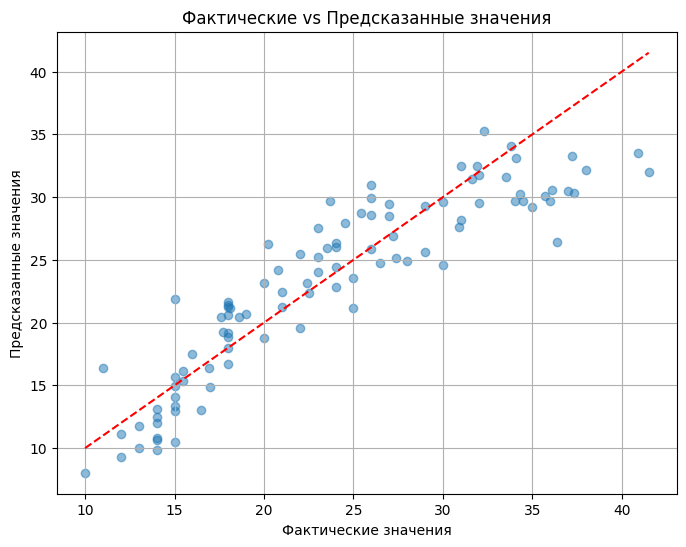

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title("Фактические vs Предсказанные значения")
plt.grid()
plt.show()

##**Остатки регрессии (Residuals Plot)**
Остаток - это разница между фактическим и предсказанным значением (y_true - y_pred).
Этот график помогает проверить важное предположение линейной регресии: что остатки случайны и не имеют паттернов.

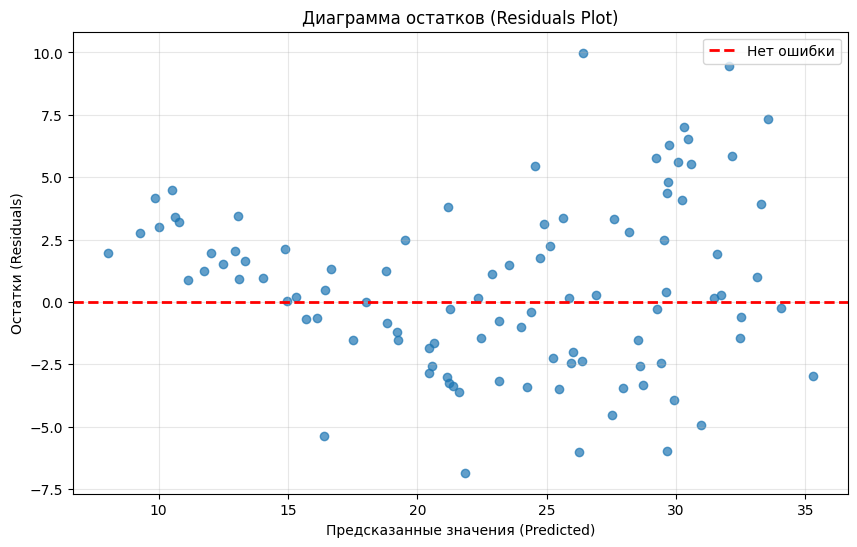

In [46]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0,color='red', linestyle='--', linewidth=2, label='Нет ошибки')
plt.xlabel('Предсказанные значения (Predicted)')
plt.ylabel('Остатки (Residuals)')
plt.title('Диаграмма остатков (Residuals Plot)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Результат:
* Хорошо: Остатки беспорядочно разбросаны вокруг горизонтальной красной линии (нуля), нет никаких явных дуг, форм или конусов.